link dataset = https://www.kaggle.com/datasets/deepcontractor/is-that-santa-image-classification

**Import Library**

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Read Dataset**

In [29]:
train_dir = 'is that santa/train'
test_dir = 'is that santa/test'

In [47]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale = 1./255,
            validation_split=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

**Split data**

In [48]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = "binary",
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)


Found 614 images belonging to 2 classes.
Found 122 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


**Menampilkan nama kelas**

In [49]:
class_name = list(train_generator.class_indices.keys())
class_name

['not-a-santa', 'santa']

**Mengidentifikasi foto (santa atau bukan santa)**

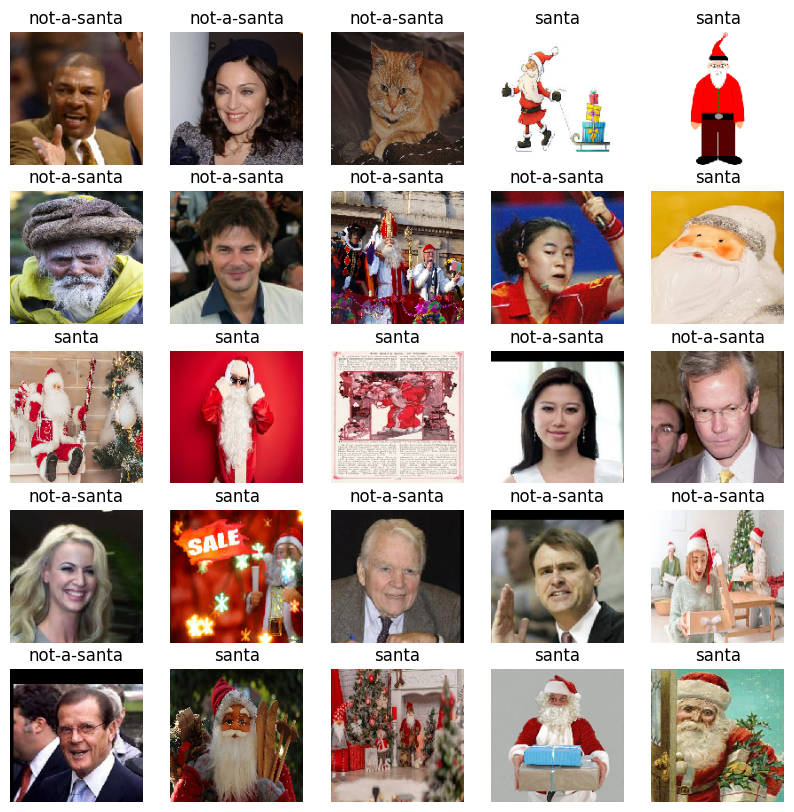

In [50]:
plt.figure(figsize=(10, 10))
for images, labels in train_generator:
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_name[int(labels[i])])
        plt.axis("off")
    break
plt.show()

**Sequential Model**

In [51]:
model = tf.keras.Sequential((
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D((2,2)),

    tf.keras.layers.Conv2D(64, (2,2), activation="relu"),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid") 
))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 73, 73, 64)        8256      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

**Compile Model**

In [53]:
model.compile(optimizer="adam", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

**Training Model**

In [58]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs=10,
                    verbose=1)

Epoch 1/10
20/20 [==============================] - 16s 794ms/step - loss: 0.0837 - accuracy: 0.9707 - val_loss: 0.1031 - val_accuracy: 0.9262
Epoch 2/10
20/20 [==============================] - 15s 743ms/step - loss: 0.0916 - accuracy: 0.9658 - val_loss: 0.1382 - val_accuracy: 0.9426
Epoch 3/10
20/20 [==============================] - 15s 724ms/step - loss: 0.0709 - accuracy: 0.9756 - val_loss: 0.0336 - val_accuracy: 0.9918
Epoch 4/10
20/20 [==============================] - 19s 975ms/step - loss: 0.0204 - accuracy: 0.9984 - val_loss: 0.0393 - val_accuracy: 0.9754
Epoch 5/10
20/20 [==============================] - 16s 820ms/step - loss: 0.0173 - accuracy: 0.9935 - val_loss: 0.0142 - val_accuracy: 0.9918
Epoch 6/10
20/20 [==============================] - 16s 762ms/step - loss: 0.0086 - accuracy: 0.9984 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 7/10
20/20 [==============================] - 16s 832ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 1.0000

**Evaluasi Model**

In [41]:
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))

print("Loss", loss)
print("Accuracy", accuracy)

20/20 [==============================] - 5s 266ms/step - loss: 0.2853 - accuracy: 0.8799
Loss 0.28529319167137146
Accuracy 0.8798701167106628


**Grafik yang menampilkan pergerakan metrics dan loss terhadap epoch**

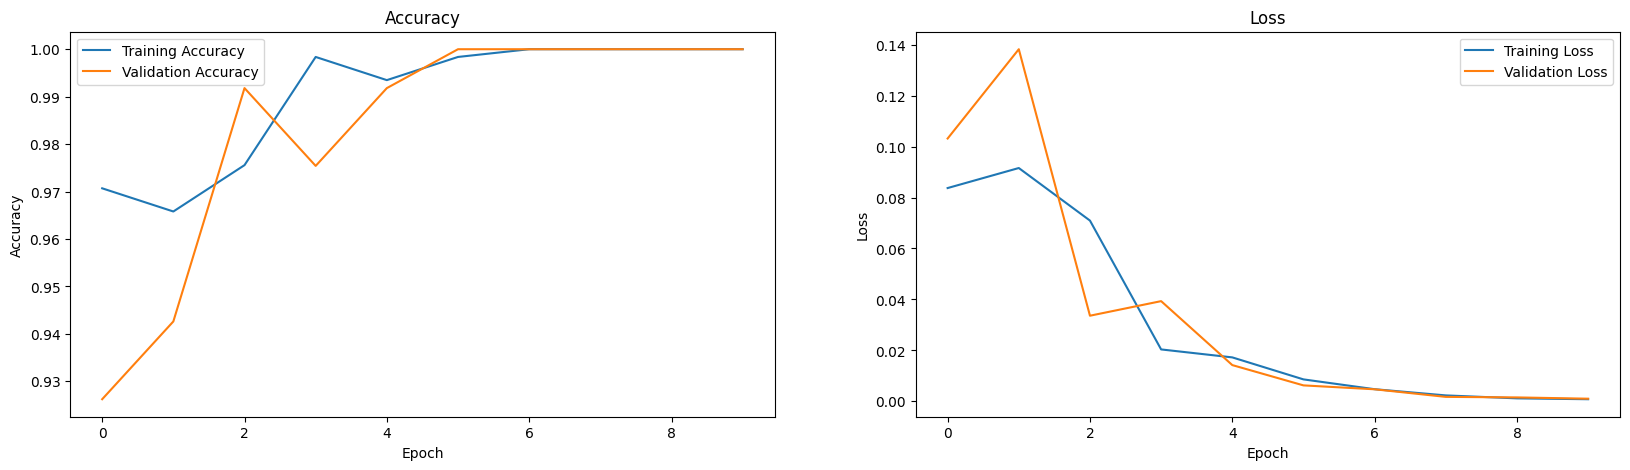

In [59]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()